# Grouping

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 6
pd.options.display.max_columns = 6
pd.options.display.width = 80

We'll use the same dataset of beer reviews.

In [2]:
df = pd.read_hdf('data/beer.hdf')

# Groupby

Groupby is a fundamental operation to pandas and data analysis.

The components of a groupby operation are to

1. Split a table into groups
2. Apply a function to each groups
3. Combine the results

http://pandas.pydata.org/pandas-docs/stable/groupby.html

In pandas the first step looks like

``df.groupby( grouper )``

`grouper` can be many things

- ``Series`` (or string indicating a column in a ``DataFrame``)
- function (to be applied on the index)
- dict : groups by *values*
- `levels=[]`, names of levels in a MultiIndex

In [3]:
gr = df.groupby('beer_style')
gr

Haven't really done anything yet. Just some book-keeping to figure out which **keys** go with which rows. Keys are the things we've grouped by (each `beer_style` in this case).

In [4]:
gr.ngroups

104

In [5]:
list(gr.groups)[0:5]

['American Amber / Red Ale',
 'Belgian Strong Dark Ale',
 'Foreign / Export Stout',
 'Maibock / Helles Bock',
 'Baltic Porter']

In [6]:
cols = ['beer_style'] + df.columns.difference(['beer_style']).tolist()
cols

['beer_style',
 'abv',
 'beer_id',
 'beer_name',
 'brewer_id',
 'profile_name',
 'review_appearance',
 'review_aroma',
 'review_overall',
 'review_palate',
 'review_taste',
 'text',
 'time']

In [7]:
gr.get_group('Tripel')[cols]

,beer_style,abv,beer_id,...,review_taste,text,time
42,Tripel,8.0,1631,...,4.0,"Was perusing a store for some new items, and ...",2009-10-05 22:12:23
79,Tripel,8.5,5426,...,4.0,Appearance: Pours a very cloudy chestnut colo...,2009-10-05 23:02:42
102,Tripel,10.0,2566,...,4.0,Poured a nice slightly cloudy golden yellow w...,2009-10-05 23:31:27
...,...,...,...,...,...,...,...
49882,Tripel,8.0,1631,...,4.0,"Pours a golden amber, with a big head that st...",2009-12-25 05:02:03
49945,Tripel,7.8,1054,...,3.5,A- It's pretty. Nice golden yellow. Nice and ...,2009-12-25 08:41:01
49949,Tripel,8.0,658,...,3.5,From a 750 ml caged and corked brown bottle. ...,2009-12-25 09:39:25


In [8]:
df.loc[df.beer_style=='Tripel',cols]

,beer_style,abv,beer_id,...,review_taste,text,time
42,Tripel,8.0,1631,...,4.0,"Was perusing a store for some new items, and ...",2009-10-05 22:12:23
79,Tripel,8.5,5426,...,4.0,Appearance: Pours a very cloudy chestnut colo...,2009-10-05 23:02:42
102,Tripel,10.0,2566,...,4.0,Poured a nice slightly cloudy golden yellow w...,2009-10-05 23:31:27
...,...,...,...,...,...,...,...
49882,Tripel,8.0,1631,...,4.0,"Pours a golden amber, with a big head that st...",2009-12-25 05:02:03
49945,Tripel,7.8,1054,...,3.5,A- It's pretty. Nice golden yellow. Nice and ...,2009-12-25 08:41:01
49949,Tripel,8.0,658,...,3.5,From a 750 ml caged and corked brown bottle. ...,2009-12-25 09:39:25


The last two steps, apply and combine:

In [9]:
gr.agg('mean')

,abv,beer_id,brewer_id,...,review_overall,review_palate,review_taste
beer_style,,,,,,,
Altbier,5.936331,28241.698324,4724.486034,...,3.790503,3.689944,3.703911
American Adjunct Lager,4.880552,9403.638070,1541.485255,...,3.071716,2.733244,2.674933
American Amber / Red Ale,6.135963,23557.469145,3314.523420,...,3.833829,3.694796,3.734944
...,...,...,...,...,...,...,...
Wheatwine,10.766667,44146.641618,2363.132948,...,3.722543,3.872832,3.947977
Winter Warmer,6.520407,22726.750603,2315.001609,...,3.805310,3.703540,3.767900
Witbier,5.850545,29447.023904,3096.407703,...,3.742364,3.567729,3.624170


This says apply the `mean` function to each column. Non-numeric columns (nusiance columns) are excluded. We can also select a subset of columns to perform the aggregation on.

In [10]:
review_columns = ['abv','review_overall','review_appearance',
                  'review_palate','review_taste']
gr[review_columns].agg('mean')

,abv,review_overall,review_appearance,review_palate,review_taste
beer_style,,,,,
Altbier,5.936331,3.790503,3.776536,3.689944,3.703911
American Adjunct Lager,4.880552,3.071716,2.783512,2.733244,2.674933
American Amber / Red Ale,6.135963,3.833829,3.836431,3.694796,3.734944
...,...,...,...,...,...
Wheatwine,10.766667,3.722543,3.916185,3.872832,3.947977
Winter Warmer,6.520407,3.805310,3.864441,3.703540,3.767900
Witbier,5.850545,3.742364,3.634794,3.567729,3.624170


`.` attribute lookup works as well.

In [11]:
gr.abv.agg('mean')

beer_style
Altbier                      5.936331
American Adjunct Lager       4.880552
American Amber / Red Ale     6.135963
                              ...    
Wheatwine                   10.766667
Winter Warmer                6.520407
Witbier                      5.850545
Name: abv, dtype: float64

Find the `beer_style` with the greatest variance in `abv`.

In [12]:
(df
   .groupby('beer_style')
   .abv
   .std()
   .sort_values(ascending=False)
 )

beer_style
American Strong Ale                 3.506721
American Double / Imperial Stout    2.785742
Flanders Oud Bruin                  2.723145
                                      ...   
Gose                                0.185557
Low Alcohol Beer                    0.121006
Happoshu                            0.000000
Name: abv, dtype: float64

Multiple Aggregations on one column

In [13]:
gr['review_aroma'].agg([np.mean, np.std, 'count'])

,mean,std,count
beer_style,,,
Altbier,3.581006,0.561276,179
American Adjunct Lager,2.479893,0.732925,746
American Amber / Red Ale,3.653532,0.588231,1345
...,...,...,...
Wheatwine,3.942197,0.484780,173
Winter Warmer,3.738938,0.579463,1243
Witbier,3.619522,0.589968,753


Single Aggregation on multiple columns

In [14]:
gr[review_columns].mean()

,abv,review_overall,review_appearance,review_palate,review_taste
beer_style,,,,,
Altbier,5.936331,3.790503,3.776536,3.689944,3.703911
American Adjunct Lager,4.880552,3.071716,2.783512,2.733244,2.674933
American Amber / Red Ale,6.135963,3.833829,3.836431,3.694796,3.734944
...,...,...,...,...,...
Wheatwine,10.766667,3.722543,3.916185,3.872832,3.947977
Winter Warmer,6.520407,3.805310,3.864441,3.703540,3.767900
Witbier,5.850545,3.742364,3.634794,3.567729,3.624170


Multiple aggregations on multiple columns

In [15]:
result = gr[review_columns].agg(['mean', 'count', 'std'])
result.columns.names=['characteristic','measure']
result

characteristic                  abv                    ...    review_taste  \
measure                        mean count       std    ...            mean   
beer_style                                             ...                   
Altbier                    5.936331   169  1.394085    ...        3.703911   
American Adjunct Lager     4.880552   706  0.405311    ...        2.674933   
American Amber / Red Ale   6.135963  1256  1.299676    ...        3.734944   
...                             ...   ...       ...    ...             ...   
Wheatwine                 10.766667   171  1.043411    ...        3.947977   
Winter Warmer              6.520407  1228  1.079628    ...        3.767900   
Witbier                    5.850545   716  1.561416    ...        3.624170   

characteristic                            
measure                  count       std  
beer_style                                
Altbier                    179  0.608033  
American Adjunct Lager     746  0.815884  
American Amber / Red Ale  1345  0.640439  
...                        ...       ...  
Wheatwine                  173  0.624275  
Winter Warmer             1243  0.621533  
Witbier                    753  0.674517  

[104 rows x 15 columns]

Hierarchical Indexes in the columns can be awkward to work with, so I'll usually
move a level to the Index with `.stack`.

http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-by-stacking-and-unstacking

In [16]:
result

characteristic                  abv                    ...    review_taste  \
measure                        mean count       std    ...            mean   
beer_style                                             ...                   
Altbier                    5.936331   169  1.394085    ...        3.703911   
American Adjunct Lager     4.880552   706  0.405311    ...        2.674933   
American Amber / Red Ale   6.135963  1256  1.299676    ...        3.734944   
...                             ...   ...       ...    ...             ...   
Wheatwine                 10.766667   171  1.043411    ...        3.947977   
Winter Warmer              6.520407  1228  1.079628    ...        3.767900   
Witbier                    5.850545   716  1.561416    ...        3.624170   

characteristic                            
measure                  count       std  
beer_style                                
Altbier                    179  0.608033  
American Adjunct Lager     746  0.815884  
American Amber / Red Ale  1345  0.640439  
...                        ...       ...  
Wheatwine                  173  0.624275  
Winter Warmer             1243  0.621533  
Witbier                    753  0.674517  

[104 rows x 15 columns]

In [17]:
multi = result.stack(level='characteristic')
multi

measure                           mean  count       std
beer_style characteristic                              
Altbier    abv                5.936331    169  1.394085
           review_overall     3.790503    179  0.674136
           review_appearance  3.776536    179  0.578459
...                                ...    ...       ...
Witbier    review_appearance  3.634794    753  0.581826
           review_palate      3.567729    753  0.615671
           review_taste       3.624170    753  0.674517

[520 rows x 3 columns]

In [18]:
result.stack(level='measure')

characteristic             abv  review_overall  review_appearance  \
beer_style measure                                                  
Altbier    mean       5.936331        3.790503           3.776536   
           count    169.000000      179.000000         179.000000   
           std        1.394085        0.674136           0.578459   
...                        ...             ...                ...   
Witbier    mean       5.850545        3.742364           3.634794   
           count    716.000000      753.000000         753.000000   
           std        1.561416        0.700511           0.581826   

characteristic      review_palate  review_taste  
beer_style measure                               
Altbier    mean          3.689944      3.703911  
           count       179.000000    179.000000  
           std           0.583201      0.608033  
...                           ...           ...  
Witbier    mean          3.567729      3.624170  
           count       753.000000    753.000000  
           std           0.615671      0.674517  

[312 rows x 5 columns]

In [19]:
# stack-unstack are inverses
(result
      .stack(level='measure')
      .unstack(level='measure')
 )

characteristic                  abv                      ...    review_taste  \
measure                        mean   count       std    ...            mean   
beer_style                                               ...                   
Altbier                    5.936331   169.0  1.394085    ...        3.703911   
American Adjunct Lager     4.880552   706.0  0.405311    ...        2.674933   
American Amber / Red Ale   6.135963  1256.0  1.299676    ...        3.734944   
...                             ...     ...       ...    ...             ...   
Wheatwine                 10.766667   171.0  1.043411    ...        3.947977   
Winter Warmer              6.520407  1228.0  1.079628    ...        3.767900   
Witbier                    5.850545   716.0  1.561416    ...        3.624170   

characteristic                              
measure                    count       std  
beer_style                                  
Altbier                    179.0  0.608033  
American Adjunct Lager     746.0  0.815884  
American Amber / Red Ale  1345.0  0.640439  
...                          ...       ...  
Wheatwine                  173.0  0.624275  
Winter Warmer             1243.0  0.621533  
Witbier                    753.0  0.674517  

[104 rows x 15 columns]

You can group by **levels** of a MultiIndex.

In [20]:
(result.stack(level='characteristic')
       .groupby(level='beer_style')
       ['mean']
       .agg(['min', 'max' ])
 )

,min,max
beer_style,,
Altbier,3.689944,5.936331
American Adjunct Lager,2.674933,4.880552
American Amber / Red Ale,3.694796,6.135963
...,...,...
Wheatwine,3.722543,10.766667
Winter Warmer,3.703540,6.520407
Witbier,3.567729,5.850545


Group by **multiple** columns

In [21]:
df.groupby(['brewer_id', 'beer_style'])[review_columns].mean()

abv  review_overall  \
brewer_id beer_style                                                 
1         Czech Pilsener                  4.389286           3.875   
3         American Adjunct Lager          4.200000           3.750   
          American Amber / Red Ale        5.200000           3.750   
...                                            ...             ...   
24964     American Malt Liquor            6.900000           3.250   
25680     Euro Pale Lager                 5.300000           3.500   
27039     American Double / Imperial IPA  9.990000           4.750   

                                          review_appearance  review_palate  \
brewer_id beer_style                                                         
1         Czech Pilsener                           3.589286       3.571429   
3         American Adjunct Lager                   3.250000       3.500000   
          American Amber / Red Ale                 3.694444       3.638889   
...                                                     ...            ...   
24964     American Malt Liquor                     3.000000       2.750000   
25680     Euro Pale Lager                          4.000000       3.500000   
27039     American Double / Imperial IPA           4.500000       4.750000   

                                          review_taste  
brewer_id beer_style                                    
1         Czech Pilsener                      3.660714  
3         American Adjunct Lager              2.750000  
          American Amber / Red Ale            3.611111  
...                                                ...  
24964     American Malt Liquor                3.250000  
25680     Euro Pale Lager                     3.500000  
27039     American Double / Imperial IPA      4.750000  

[7580 rows x 5 columns]

### Exercise: Plot the relationship between review length (the `text` column) and average `review_overall`.

- Find the **len**gth of each reivew (remember the `df.text.str` namespace?)
- Group by that Series of review lengths
- Using the '.k' plotting style

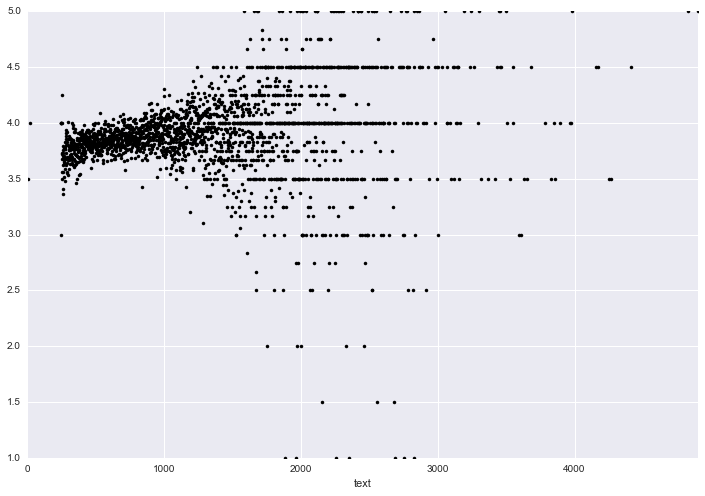

In [22]:
(df.groupby(df.text.str.len())
   .review_overall
   .mean()
   .plot(style='.k', figsize=(12,8))
 )


## What are we doing

In [23]:
df.text.str.len()

0         364
1         590
2        1786
         ... 
49997     714
49998     427
49999    1018
Name: text, dtype: int64

In [24]:
df.groupby(df.text.str.len()).ngroups

2201

We've seen a lot of permutations among number of groupers, number of columns to aggregate, and number of aggregators.
In fact, the `.agg`, which returns one row per group, is just one kind of way to combine the results. The three ways are

- `agg`: one row per results
- `transform`: identicaly shaped output as input
- `apply`: anything goes


# Transform

Combined Series / DataFrame is the same shape as the input. For example, say you want to standardize the reviews by subtracting the mean.

In [25]:
def de_mean(reviews):
    s = reviews - reviews.mean()
    return s

In [26]:
de_mean(df.review_overall)

0        0.65018
1        0.65018
2       -0.84982
          ...   
49997    1.15018
49998    0.15018
49999    1.15018
Name: review_overall, dtype: float64

In [27]:
df.groupby('profile_name').transform(de_mean)

,abv,beer_id,brewer_id,...,review_overall,review_palate,review_taste
0,-2.763000,-14386.800000,-250.800000,...,0.500000,-0.100000,0.450000
1,-1.501562,-12613.333333,3168.025641,...,0.397436,0.038462,-0.012821
2,-2.072727,-10567.348485,805.833333,...,-0.803030,-0.568182,-0.287879
...,...,...,...,...,...,...,...
49997,0.400000,4817.388889,1236.833333,...,0.916667,0.777778,0.555556
49998,-1.625862,-36774.032258,-4302.516129,...,-0.112903,-0.838710,-0.774194
49999,2.165500,20759.950000,12161.450000,...,0.925000,0.575000,0.375000


Oftentimes is better to work with the groupby object directly

In [28]:
(df-df.groupby('profile_name').transform('mean')
).select_dtypes(exclude=['object'])

,abv,beer_id,brewer_id,...,review_overall,review_palate,review_taste
0,-2.763000,-14386.800000,-250.800000,...,0.500000,-0.100000,0.450000
1,-1.501562,-12613.333333,3168.025641,...,0.397436,0.038462,-0.012821
2,-2.072727,-10567.348485,805.833333,...,-0.803030,-0.568182,-0.287879
...,...,...,...,...,...,...,...
49997,0.400000,4817.388889,1236.833333,...,0.916667,0.777778,0.555556
49998,-1.625862,-36774.032258,-4302.516129,...,-0.112903,-0.838710,-0.774194
49999,2.165500,20759.950000,12161.450000,...,0.925000,0.575000,0.375000


In [29]:
%timeit df.groupby('profile_name').transform(de_mean)

1 loop, best of 3: 6.17 s per loop


In [30]:
%timeit (df-df.groupby('profile_name').transform('mean')).select_dtypes(exclude=['object'])

1 loop, best of 3: 3.64 s per loop


In [31]:
df.groupby('profile_name').ngroups

4124